# 감성 분석

## 지도 학습 기반 감성 분석 실습 (imdb 영화평)

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings ('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
reviewdf = pd.review_df = pd.read_csv('./data/labeledTrainData.tsv', header = 0, sep='\t', quoting= 3)
reviewdf.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


In [4]:
reviewdf['review'][0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

In [5]:
reviewdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [6]:
import re
# <br> html 태그는 replace 함수로 공백으로 변환
reviewdf['review'] = reviewdf['review'].str.replace('<br /',' ')

# 파이썬의 정규 표현식 모듈인 re를 이용해 영어 문자열이 아닌 문자는 모두 공백으로 변환
reviewdf['review'] = reviewdf['review'].apply(lambda x : re.sub("[^a-zA-Z]"," ", x))

In [76]:
reviewdf['review'].values

array([' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay     Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him     The actual feature film bit when it finally starts is o

In [8]:
from sklearn.model_selection import train_test_split

classdf = reviewdf['sentiment']
featuredf = reviewdf.drop(['id','sentiment'],axis = 1, inplace=False)
x_train, x_test, y_train, y_test = train_test_split(featuredf,classdf, test_size =0.3,
                                                       random_state=156)

### CountVectorizer

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline

# 스톱 워드는 English, filtering ngram은 (1,2)로 설정새 CountVectorization 수행
# LogisticRegression의 C는 10으로 설정.

cvect = CountVectorizer(stop_words = 'english', ngram_range=(1,2))
x_train_cvect = cvect.fit_transform(x_train['review'],y_train)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lr_clf = LogisticRegression(C=10, n_jobs = 8)
lr_clf.fit(x_train_cvect,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=8, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
x_test_cvect = cvect.transform(x_test['review'])
pred = lr_clf.predict(x_test_cvect)

In [13]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [14]:
accuracy_score(y_test, pred)

0.886

### TfidfVectorizer

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvect = TfidfVectorizer(stop_words = 'english', ngram_range=(1,2))
x_train_cvect = tvect.fit_transform(x_train['review'],y_train)

In [31]:
lr_clf = LogisticRegression(C=10)
lr_clf.fit(x_train_cvect,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=8, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
x_test_cvect = tvect.transform(x_test['review'])
pred = lr_clf.predict(x_test_cvect)

In [27]:
accuracy_score(y_test, pred)

0.8936

In [32]:
pipeline = Pipeline([
    ('cve.ct',CountVectorizer(stop_words='english',ngram_range=(1,2))),
    ('lr_clf',LogisticRegression(C=10))])

pipeline.fit(x_train['review'],y_train)
pred = pipeline.predict(x_test['review'])
pred_proba = pipeline.predict_proba(x_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test,pred),
                                                roc_auc_score(y_test,pred_proba)))

예측 정확도는 0.8860, ROC-AUC는 0.9503


In [33]:
pipeline = Pipeline([
    ('cvect',TfidfVectorizer(stop_words='english',ngram_range=(1,2))),
    ('lr_clf',LogisticRegression(C=10))])

pipeline.fit(x_train['review'],y_train)
pred = pipeline.predict(x_test['review'])
pred_proba = pipeline.predict_proba(x_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test,pred),
                                                roc_auc_score(y_test,pred_proba)))

예측 정확도는 0.8936, ROC-AUC는 0.9598


In [168]:
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
words = reviewdf['review'].values
word1 = [i for i in words]
for i in word1:
    if i not in stopwords:
        text = ' '.join([str(elem) for elem in word_tokenize(i)])

In [171]:
wc = WordCloud(background_color='black', max_words=2000)
wc = wc.generate(text)
wc.words_

{'movie': 1.0,
 'child': 0.75,
 'story': 0.75,
 'Wolf': 0.75,
 'saw': 0.5,
 'Chirin': 0.5,
 'made': 0.5,
 'alone': 0.5,
 'kill': 0.5,
 'glad': 0.5,
 'broke': 0.25,
 'heart': 0.25,
 'No': 0.25,
 'unfinished': 0.25,
 'ending': 0.25,
 'grew': 0.25,
 'many': 0.25,
 'great': 0.25,
 'anime': 0.25,
 'one': 0.25,
 'favourites': 0.25,
 'unusual': 0.25,
 'unfairness': 0.25,
 'cruelty': 0.25,
 'loneliness': 0.25,
 'life': 0.25,
 'choices': 0.25,
 'undone': 0.25,
 'need': 0.25,
 'mother': 0.25,
 'follows': 0.25,
 'mountain': 0.25,
 'doesn': 0.25,
 'lamb': 0.25,
 'even': 0.25,
 'though': 0.25,
 'night': 0.25,
 'says': 0.25,
 'maybe': 0.25,
 'll': 0.25,
 'eat': 0.25,
 'tomorrow': 0.25,
 'tape': 0.25,
 'broken': 0.25,
 'degraded': 0.25,
 'age': 0.25,
 'use': 0.25,
 'will': 0.25,
 'repair': 0.25,
 'watch': 0.25,
 'someday': 0.25,
 'cry': 0.25,
 'hard': 0.25,
 'Stories': 0.25,
 'depth': 0.25,
 'feeling': 0.25,
 'intricacy': 0.25,
 'meaning': 0.25,
 'rare': 0.25,
 'sad': 0.25,
 've': 0.25,
 'never': 0.2

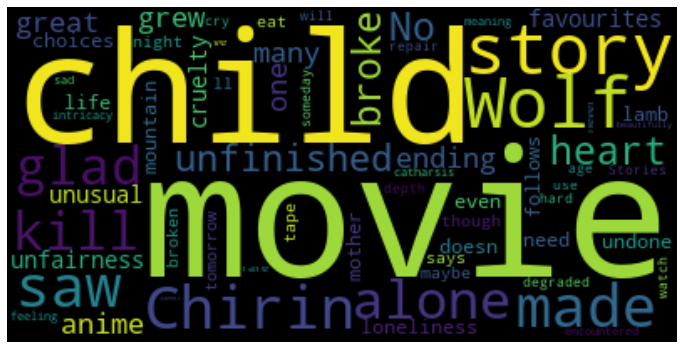

In [172]:
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()